In [1]:
from simulation.model import PathFindingModel
import mesa
import analytics.ranking_measures as measures
import pandas as pd

In [2]:
def group_summary(df, measure_func):
    group_statistics = {
        'zone':df['goal_zones'].iloc[0],
        'alg':df['path_planning_alg'].iloc[0],
        'goal_pop':df['intention_num'].iloc[0],
        'seed':df['seed'].iloc[0],
        'obstacle_used':df['obstacle_used'].iloc[0],
        'segments':df['segment_num'].max(),
        'segment_measure':measure_func(df['Segment_ranking'],ground_truth_position=df['true_intention'].iloc[0]),
        'masters_measure':measure_func(df['Masters_ranking'],ground_truth_position=df['true_intention'].iloc[0]),
        'mirroring_measure':measure_func(df['Mirroring_ranking'],ground_truth_position=df['true_intention'].iloc[0])}
    return pd.Series(group_statistics)

def df_transform(raw_df, measure_func):
    run_statistics = raw_df.groupby('RunId').apply(lambda x: group_summary(x, measure_func))
    # run_statistics.set_index(['zone','goal_pop','seed','alg','obstacle_used'], inplace=True)
    return run_statistics

## Experiment 1: Justification of segmentation

In [10]:
params = {"width":20,"height":20,"obs_num":40,"goal_zones":['2,2,2,2','0,0,0,0'],"seed":range(0,300),"path_planning_alg":[0,1,2],"intention_profile":1}
results = mesa.batch_run(
    PathFindingModel,
    parameters = params,
    iterations = 1,
    max_steps = 500,
    number_processes = None,
    data_collection_period = 1,
    display_progress=True,
)
results_df_e1 = pd.DataFrame(results)

100%|██████████| 1800/1800 [1:11:03<00:00,  2.37s/it]


#### General correctness

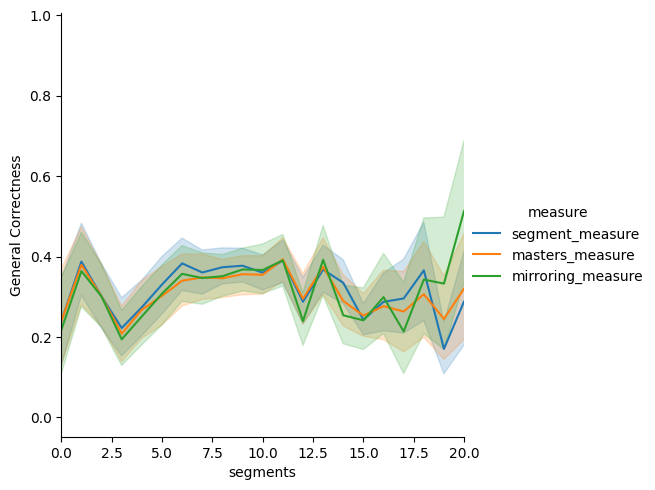

In [11]:
import seaborn as sns
e1_gc = df_transform(results_df_e1, measures.correctness)
e1_gc_long = pd.melt(e1_gc.reset_index(), id_vars=['zone','alg','goal_pop','seed','obstacle_used','segments'], value_vars=['segment_measure','masters_measure','mirroring_measure'], var_name='measure', value_name='General Correctness')
g = sns.relplot(data=e1_gc_long, x='segments', y='General Correctness', hue='measure', kind='line')
g.set(xlim=(0,20))

#### Final correctness

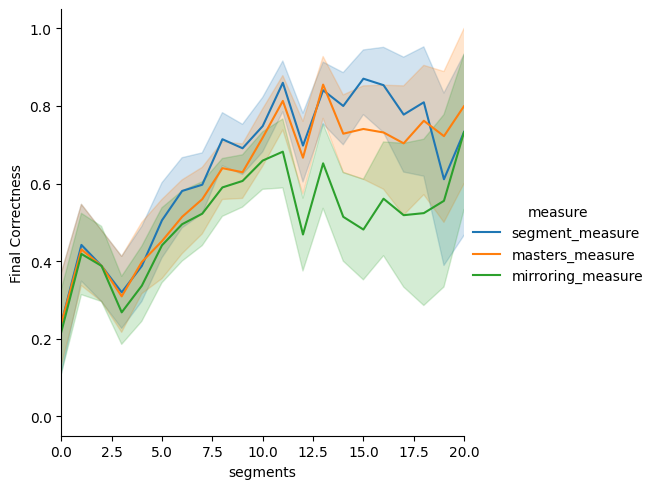

In [12]:
e1_fc = df_transform(results_df_e1, measures.final_correctness)
e1_fc_long = pd.melt(e1_fc.reset_index(), id_vars=['zone','alg','goal_pop','seed','obstacle_used','segments'], value_vars=['segment_measure','masters_measure','mirroring_measure'], var_name='measure', value_name='Final Correctness')
g = sns.relplot(data=e1_fc_long, x='segments', y='Final Correctness', hue='measure', kind='line')
g.set(xlim=(0,20))

#### Convergence correctness

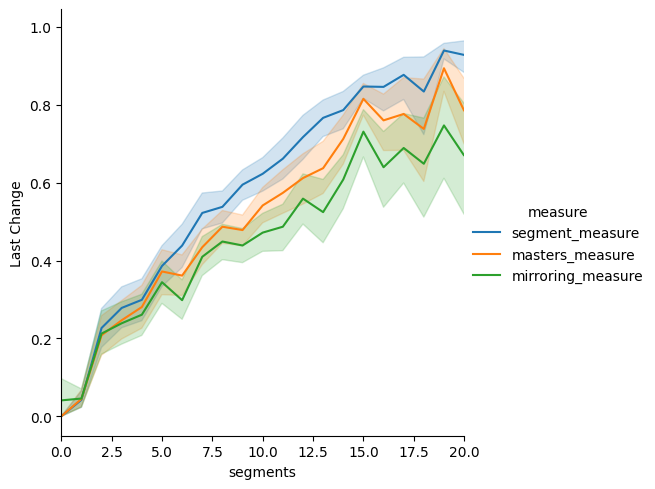

In [13]:
e1_cc = df_transform(results_df_e1, measures.last_change)
e1_cc_long = pd.melt(e1_cc.reset_index(), id_vars=['zone','alg','goal_pop','seed','obstacle_used','segments'], value_vars=['segment_measure','masters_measure','mirroring_measure'], var_name='measure', value_name='Last Change')
g = sns.relplot(data=e1_cc_long, x='segments', y='Last Change', hue='measure', kind='line')
g.set(xlim=(0,20))

#### Stability

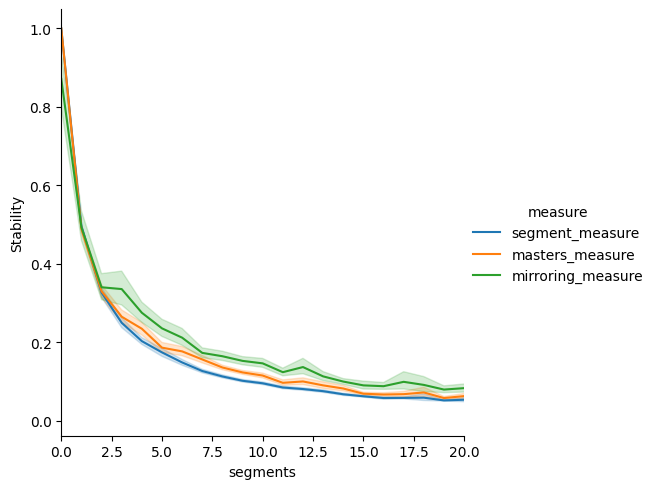

In [14]:
e1_stability = df_transform(results_df_e1, measures.stability)
e1_stability_long = pd.melt(e1_stability.reset_index(), id_vars=['zone','alg','goal_pop','seed','obstacle_used','segments'], value_vars=['segment_measure','masters_measure','mirroring_measure'], var_name='measure', value_name='Stability')
g = sns.relplot(data=e1_stability_long, x='segments', y='Stability', hue='measure', kind='line')
g.set(xlim=(0,20))